### Import first package of required libs

In [68]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#saving data plots

project_root_dir = '.'
images_path = os.path.join(project_root_dir, 'images')
os.makedirs(images_path, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(images_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Data download

In [11]:
data_file = 'data/stores.csv'

In [12]:
data = pd.read_csv(data_file)

### take a look at the data and data's structure

In [13]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [16]:
data.shape

(896, 5)

In [17]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


### copy data in new df, to drop column "Store ID"

In [35]:
stores = data.copy()

In [36]:
stores.columns[0]

'Store ID '

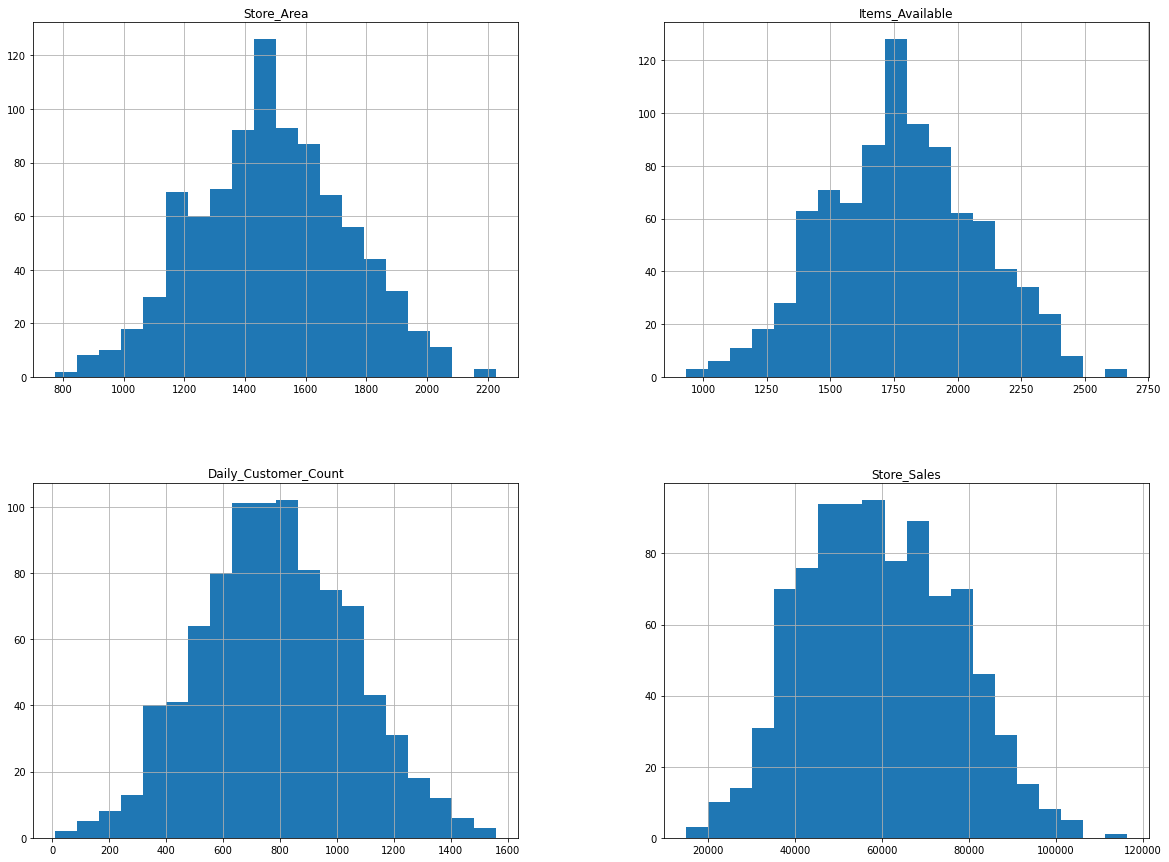

In [37]:
stores.drop(stores.columns[0], axis=1, inplace=True)
stores.hist(bins=20, figsize=(20,15))
plt.show()

### Train and test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
stores_train, stores_test = train_test_split(stores, test_size=.2, random_state=24)

In [49]:
print(stores_train.shape, stores_test.shape, sep='\n')

(716, 4)
(180, 4)


### discover the data

In [50]:
stores_t = stores_train.copy()

In [51]:
stores_t.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
658,1348,1623,1010,72940
68,1631,1941,650,33430
560,1371,1650,540,87160
802,1200,1442,880,44320
94,1921,2305,1470,77120


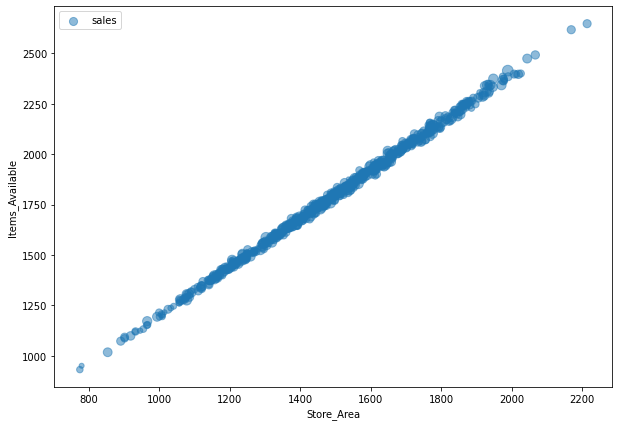

In [59]:
stores_t.plot(kind='scatter', x='Store_Area', y='Items_Available',
             s=stores_t['Store_Sales']/1000, label='sales', alpha=.5, figsize=(10,7))
plt.show()

In [60]:
corr_matrix = stores_t.corr()

In [62]:
corr_matrix['Store_Sales']

Store_Area              0.113726
Items_Available         0.115137
Daily_Customer_Count    0.028750
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

In [61]:
from pandas.plotting import scatter_matrix

Saving figure scatter_matrix_plot


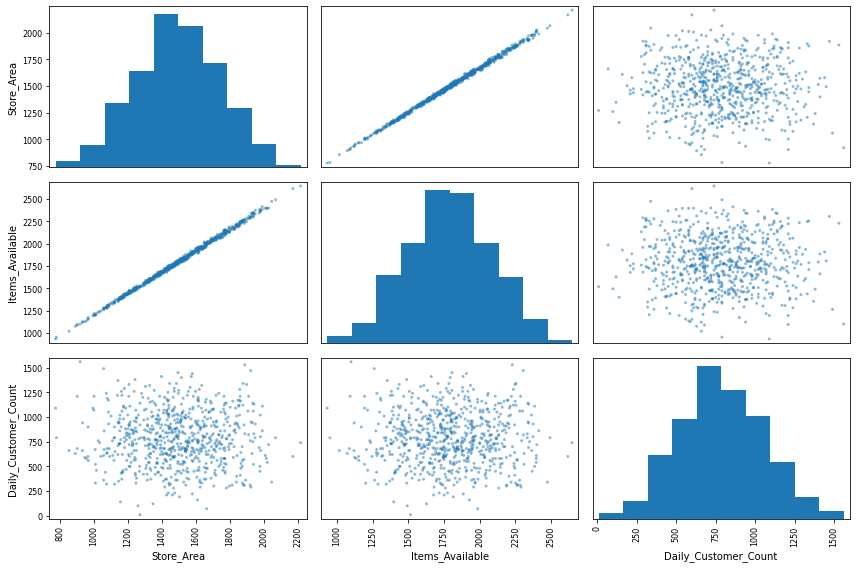

In [69]:
attributes = ['Store_Area', 'Items_Available', 'Daily_Customer_Count']

scatter_matrix(stores_t[attributes], figsize=(12,8))
save_fig('scatter_matrix_plot')